In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dynamic variable vector and initial value

We need to define a dynamic variable vector: we use the (vertical) elongation as first coordinate and the velocity as the second coordinate.
$$
\vec{y} = \left(\begin{array}{c}
x \\ v
\end{array}\right)
$$

We need to set the initial value, and we start the oscillation at maximum positive elongation $d$, with $v=0$:
$$
y_0 = \left(\begin{array}{c}
d \\ 0
\end{array}\right)
$$

In [2]:
d = 1
y0 = np.array([d,0])

# Generalized velocity vector

The right hand side of the ODE, or generalized velocity vector, is a function of the current position and velocity of the oscillator. In this problem, we do not have an explicit time dependence.
$$
\vec{g}(\vec{y},t) = \vec{u}'
= \left(\begin{array}{c}
v \\ a
\end{array}\right)
= \left(\begin{array}{c}
v \\ -kx/m
\end{array}\right)
$$



In [3]:
def g(t,y):
    k = 1.0
    m = 1.0

    return np.array([y[1], -k*y[0]/m])

# Euler Method

In [4]:
def euler(funct,t,y0):
    y = np.zeros((len(t),len(y0)))
    y[0] = y0

    for i in range(len(t)-1):
        y [i+1] = y [i] + (t[i+1]-t[i]) * g(t[i], y[i])

    return y

Solution calculated with 10000 steps


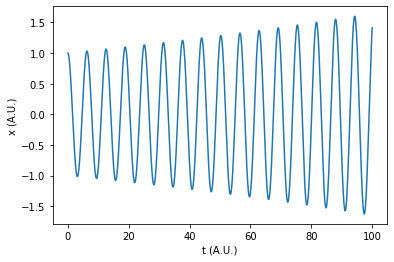

In [12]:
t = np.arange(0, 100, 1e-2)
y = euler(g,t,y0)

print("Solution calculated with",len(t),"steps")

plt.plot(t,y[:,0])
plt.xlabel("t (A.U.)")
plt.ylabel("x (A.U.)");

# 4th-order Runge-Kutta Method

In [6]:
def rk4(func,t,y0):
    y = np.zeros((len(t),len(y0)))
    y[0] = y0

    for i in range(len(t)-1):
    
        dt = t[i+1] - t[i]
        
        k1 = dt * func( t[i]          , y[i]          )
        k2 = dt * func( t[i] + 0.5*dt , y[i] + 0.5*k1 )
        k3 = dt * func( t[i] + 0.5*dt , y[i] + 0.5*k2 )
        k4 = dt * func( t[i] + 1.0*dt , y[i] + 1.0*k3 )

        y[i+1] = y[i] + 1./6. * ( k1 + 2*k2 + 2*k3 + k4)

    return y

Solution calculated with 1000 steps


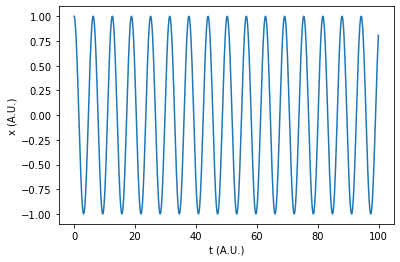

In [13]:
t = np.arange(0, 100, 1e-1)
y = rk4(g,t,y0)

print("Solution calculated with",len(t),"steps")

plt.plot(t,y[:,0])
plt.xlabel("t (A.U.)")
plt.ylabel("x (A.U.)");

# Using scipy.integrate

scipy has a package to integrate ODEs, which not only implements the Runge-Kutta algorithm, but also implements automatic adjustment of the step size, other integration algorithms and a few other features.

Solution calculated with 108 steps


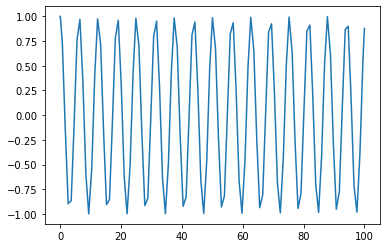

In [14]:
import scipy.integrate

sol = scipy.integrate.solve_ivp(g,[0,100],y0)

print("Solution calculated with",len(sol.t),"steps")
plt.plot(sol.t,sol.y[0]);

We notice that the plot looks irregular. This is because of the coarse step size that the algorithm uses to reduce the computation time. If we want to plot the result, we can request a maximum step size.

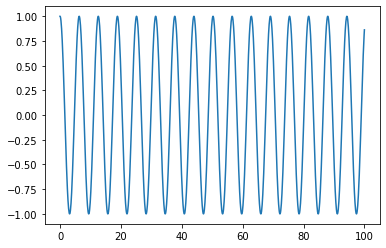

In [15]:
sol = scipy.integrate.solve_ivp(g,[0,100],y0,max_step=0.1)
plt.plot(sol.t,sol.y[0]);